라이브러리 셋팅

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

한글 폰트 입력 -> 깨짐 방지

In [3]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

데이터 가져오기(전국 친환경차, 수원 친환경차)

In [126]:
all_data = pd.read_csv('./data-files/전국 친환경 자동차.csv')
suwon1 = pd.read_csv('./data-files/수원시 전기차 연도별 출고 현황.csv')
all_data

,구 분,‘14말,‘15말,‘16말,‘17말,‘18말,‘19말,‘20말,‘21.7월
0,계,"140,297","180,361","244,158","339,134","461,733","601,048","820,329","1,003,539"
1,하이브리드차,"137,522","174,620","233,216","313,856","405,084","506,047","674,461","806,808"
2,전기차,"2,775","5,712","10,855","25,108","55,756","89,918","134,962","180,966"
3,수소차,-,29,87,170,893,"5,083","10,906","15,765"
4,친환경차등록비중(%),0.7,0.9,1.1,1.5,2,2.5,3.4,4.1


In [127]:
#전국 친환경차 데이터 전처리
all_data = all_data.dropna()
all_data = all_data.drop(columns='구 분')
all_data.index = ['계', '하이브리드차', '전기차', '수소차', '친환경차비율']
all_data.columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
all_data.columns.names = ['연도']
all_data.index.names = ['구분']
all_data = all_data.transpose()
all_data


구분,계,하이브리드차,전기차,수소차,친환경차비율
연도,,,,,
2014,"140,297","137,522","2,775",-,0.7
2015,"180,361","174,620","5,712",29,0.9
2016,"244,158","233,216","10,855",87,1.1
2017,"339,134","313,856","25,108",170,1.5
2018,"461,733","405,084","55,756",893,2
2019,"601,048","506,047","89,918","5,083",2.5
2020,"820,329","674,461","134,962","10,906",3.4
2021,"1,003,539","806,808","180,966","15,765",4.1


In [128]:
# 천단위 콤마 제거
all_data['계'] = all_data['계'].apply(lambda x: x.replace(',', ''))
all_data['하이브리드차'] = all_data['하이브리드차'].apply(lambda x: x.replace(',', ''))
all_data['전기차'] = all_data['전기차'].apply(lambda x: x.replace(',', ''))
all_data['수소차'] = all_data['수소차'].apply(lambda x: x.replace(',', ''))
all_data

# 특수문자 제거 및 nan값 대체
all_data["수소차"] = all_data["수소차"].str.replace(pat=r'[^\w]', repl=r'0', regex=True)
all_data = all_data.fillna('0')
all_data


구분,계,하이브리드차,전기차,수소차,친환경차비율
연도,,,,,
2014,140297,137522,2775,0,0.7
2015,180361,174620,5712,29,0.9
2016,244158,233216,10855,87,1.1
2017,339134,313856,25108,170,1.5
2018,461733,405084,55756,893,2
2019,601048,506047,89918,5083,2.5
2020,820329,674461,134962,10906,3.4
2021,1003539,806808,180966,15765,4.1


In [138]:
all_data2 = all_data.drop(columns='친환경차비율')
all_data2 = all_data2.astype(float).astype(int)
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2014 to 2021
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   계       8 non-null      int32
 1   하이브리드차  8 non-null      int32
 2   전기차     8 non-null      int32
 3   수소차     8 non-null      int32
dtypes: int32(4)
memory usage: 192.0+ bytes


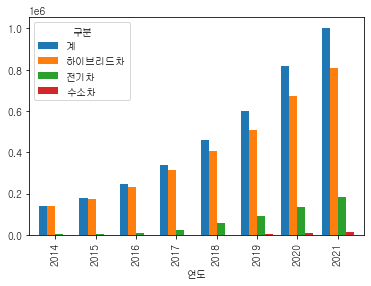

In [182]:
# 전국 친환경차 현황 시각화
all_data2.plot(kind='bar', width=0.8)
plt.show()

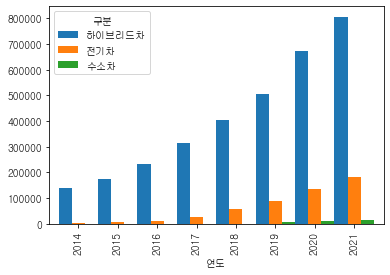

In [185]:
# 전국 친환경차 시각화2
all_data3 = all_data2.drop(columns='계')
all_data3.plot(kind='bar', width = 1)
plt.show()

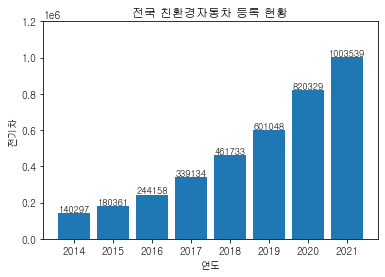

In [149]:
x = [ '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
y = all_data2['계']
plt.bar(x, y)
for i, v in enumerate(x):
    plt.text(v, y[i], str(y[i]),
             fontsize=9,
             color="black",
             horizontalalignment='center',
             verticalalignment='bottom')


plt.title("전국 친환경자동차 등록 현황")
plt.ylim(0, 1200000)
plt.xlabel('연도')
plt.ylabel('전기차')
plt.show()

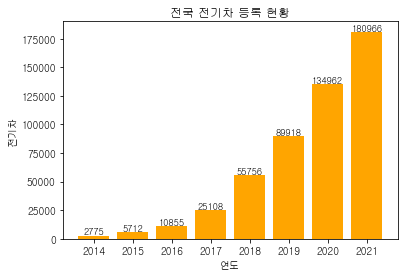

In [159]:
x = [ '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
y = all_data2['전기차']
plt.bar(x, y, color='orange' )
plt.title("전국 전기차 등록 현황")
for i, v in enumerate(x):
    plt.text(v, y[i], str(y[i]),
             fontsize=9,
             color="black",
             horizontalalignment='center',
             verticalalignment='bottom')

plt.xlabel('연도')
plt.ylabel('전기차')
plt.show()

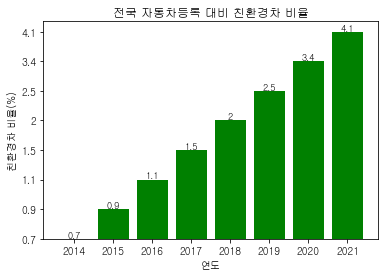

In [163]:
y = all_data['친환경차비율']
plt.bar(x, y, color='green' )
for i, v in enumerate(x):
    plt.text(v, y[i], str(y[i]),
             fontsize=9,
             color="black",
             horizontalalignment='center',
             verticalalignment='bottom')
plt.title("전국 자동차등록 대비 친환경차 비율")
plt.xlabel('연도')
plt.ylabel('친환경차 비율(%)')
plt.show()

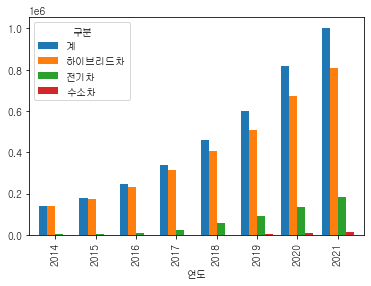

In [173]:
bar_width=0.7
all_data2.plot(kind='bar', bar_width, stacked=True)
plt.show()

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_32088/201093553.py, line 2)

TypeError: can only concatenate list (not "float") to list

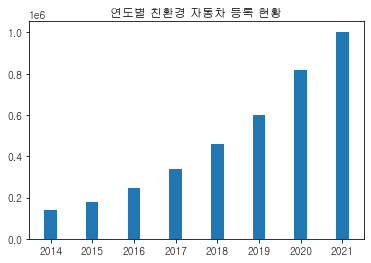

In [165]:
x = [ '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
y1 = all_data2['계']
y2 = all_data2['하이브리드차']
y3 = all_data2['전기차']
y4 = all_data2['수소차']

plt.title('연도별 친환경 자동차 등록 현황')
bar_width=0.3
plt.bar(x, y1, bar_width)
plt.bar(x+bar_width, y2, barwidth)
plt.ylim(0,1200000)
plt.show()

In [14]:
# 수원시 친환경차 데이터 전처리
suwon1.index = [1,2,3]

suwon1

,연도,시도,지역구분,전기차,전기차 승용,전기차 화물,전기차 승합
1,2019,경기,수원시,507,507,0,0
2,2020,경기,수원시,562,460,98,104
3,2021,경기,수원시,1222,948,221,53


In [ ]:
all_df = all_data.loc[['2019', '2020', '2021']]
all_df

In [1]:
label = ['2019', '2020', '2021']

plt.bar(label, suwon1['전기차'])
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  
             verticalalignment='bottom')    

plt.show()
plt.title("수원시 전기차 등록 현황")
plt.xlabel('연도')
plt.ylabel('전기차')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
label = [ '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

plt.bar(label, all_data['전기차'])
plt.title("전국 전기차 등록 현황")
plt.xlabel('연도')
plt.ylabel('전기차')
for i in range(len(x)):
    height = x[i]
    plt.text(x[i], '%.1f' %height, ha='center', va='bottom', size = 12)
plt.show()

In [ ]:
all_x = all_data.columns
all_y = all_data.index
all_x
all_y

Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], dtype='object', name='연도')